## Ultimate Challenge Part 1 -- User logins 

In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
from collections import defaultdict
import matplotlib.pyplot as plt
from pylab import rcParams
import os
os.chdir('/home/roman/Documents/Projects/Springboard/17.1 Take Home challenge/ultimate_challenge')

In [2]:
# --------------- load data and create dict with login counts --------------- #
dict_original = json.loads(open('logins.json').read())
dict_ = defaultdict(int)
for values in dict_original.values():
    for v in values:
        t = datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
        t_round = t - timedelta(minutes=t.minute % 15, seconds=t.second)
        dict_[t_round] +=1

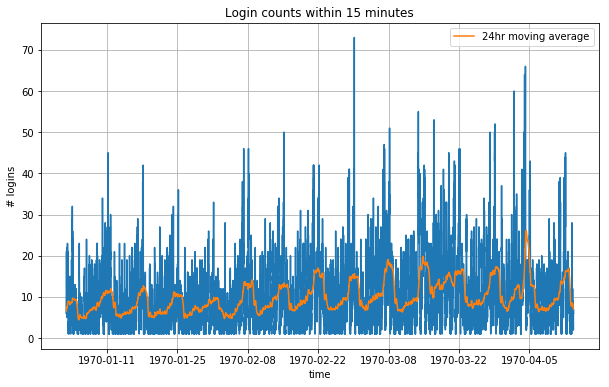

In [3]:
# --------------- plot login counts --------------- #
times = list(dict_.keys())
counts = list(dict_.values())
window = 24 * 4
m_avg = []
for i in range(window, len(times)):
    m_avg.append(np.mean(counts[i - window : i]))
rcParams['figure.figsize'] = 10, 6
plt.plot(times[window:], counts[window:])
plt.plot(times[window:], m_avg, label='24hr moving average')
plt.grid()
plt.legend()
plt.title('Login counts within 15 minutes')
plt.xlabel('time')
plt.ylabel('# logins')
plt.show()

Looking at the logins over the whole time period (more than three months) shows a high variance in number of logins. The 24 hour moving average indicates that the demand varies with a period of one week. The demand peaks on weekends (1/11/1970 is a Sunday). To get more insight on daily cycles, let's plot them individually.

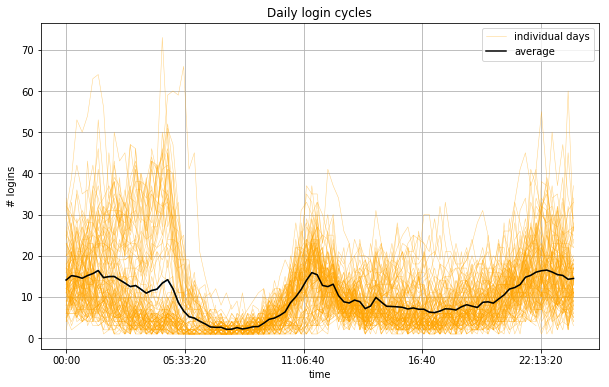

In [4]:
# --------------- daily cycles --------------- #
times = list(map(datetime.time, list(dict_.keys())))
dates = list(map(datetime.date, list(dict_.keys())))
counts = list(dict_.values())
df = pd.DataFrame({'times':times, 'dates':dates, 'counts': counts})
df_pivot = pd.pivot_table(df, values='counts', index='times', columns='dates')
mean_count = [np.mean(df_pivot.iloc[i, :]) for i in range(df_pivot.shape[0])]
plt.plot(df_pivot.index, mean_count)
for i in range(df_pivot.shape[1]):
    plt.plot(df_pivot.index, df_pivot.iloc[:, i], alpha=0.5, linewidth=0.5, \
             color='orange', label = 'individual days' if i == 1 else '')
plt.plot(df_pivot.index, mean_count, linewidth=1.5, color = 'black', label='average')
plt.grid()
plt.legend()
plt.title('Daily login cycles')
plt.ylabel('# logins')
plt.show()

The average daily demand is highest at night between 10pm and around 5am and again between around 11am and 12pm. One thing that stands out is that around between 4am and 5am there seems to be a high variance in logins with particulary high activity on some days and low activity on other days. Lets therefore have a look into this by plotting the activity between 4am and 5am over time.

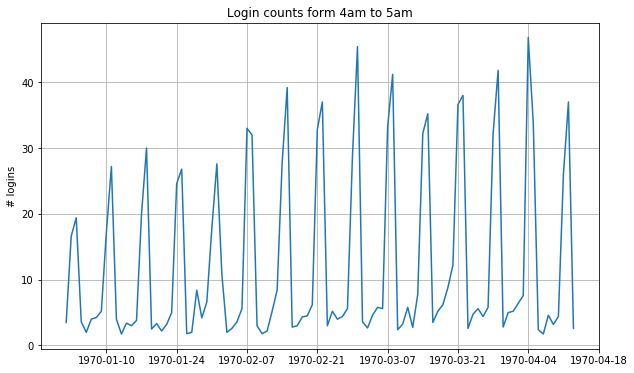

In [5]:
# --------------- logins between 4am and 5am --------------- #
times_4to5 = [datetime.strptime('04:00', '%H:%M').time(),
              datetime.strptime('04:15', '%H:%M').time(),
              datetime.strptime('04:30', '%H:%M').time(),
              datetime.strptime('04:45', '%H:%M').time(),
              datetime.strptime('05:00', '%H:%M').time()]
mean_count_4to5 = [np.mean(df_pivot.loc[times_4to5, date]) for date in df_pivot.columns]
plt.plot(df_pivot.columns, mean_count_4to5)
plt.grid()
plt.title('Login counts form 4am to 5am')
plt.ylabel('# logins')
plt.show()

The plot above shows that between 4am and 5am, the demand is particularly high on weekends whil very low on other days.